In [1]:
%matplotlib notebook

from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

from tensorflow.examples.tutorials.mnist import input_data

import sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

### Initialisations

Let us write some helper functions to initialise weights and biases. We'll initialise weights as Gaussian random variables with mean 0 and variance 0.0025. For biases we'll initialise everything with a constant 0.1. This is because we're mainly going to be using ReLU non-linearities.

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

### Model

Let's define the model. The model is defined as follows:

* An input that is 728 dimensional vector. 
* Reshape the input as 28x28x1 images (only 1 because they are grey scale) 
* A convolutional layer with 25 filters of shape 12x12x1 and a ReLU non-linearity (with stride (2, 2) and no padding)
* A convolutional layer with 64 filters of shape 5x5x25 and a ReLU non-linearity (with stride (1, 2) and padding to maintain size)
* A max_pooling layer of shape 2x2
* A fully connected layer taking all the outputs of the max_pooling layer to 1024 units and ReLU nonlinearity
* A fully connected layer taking 1024 units to 10 no activation function (the softmax non-linearity will be included in the loss function rather than in the model)

In [3]:
x = tf.placeholder(tf.float32, shape=[None, 784])
x_ = tf.reshape(x, [-1, 28, 28, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Define the first convolution layer here
# TODO
W_conv1 = weight_variable([12, 12, 1, 25])
b_conv1 = bias_variable([25])
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_, W_conv1, strides=[1,2,2,1],padding="VALID") + b_conv1)

# Define the second convolution layer here
W_conv2 = weight_variable([5,5,25,64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_conv1, W_conv2, strides=[1,1,2,1],padding="SAME") + b_conv2)

# Define maxpooling
h_pool2 = tf.nn.max_pool(h_conv2, [1,2,2,1],[1,2,2,1],padding="SAME")

# All subsequent layers will be fully connected ignoring geometry so we'll flatten the layer
# Flatten the h_pool2_layer (as it has a multidimensiona shape) 
h_pool2_flat = tf.contrib.layers.flatten(h_pool2)

# Define the first fully connected layer here
W_fc1 = weight_variable([5*3*64, 1024])
b_fc1 = weight_variable([1024])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Use dropout for this layer (should you wish)
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# The final fully connected layer
W_fc2 = weight_variable([1024,10])
b_fc2 = weight_variable([10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Loss Function, Accuracy and Training Algorithm

* We'll use the cross entropy loss function. The loss function is called `tf.nn.cross_entropy_with_logits` in tensorflow

* Accuray is simply defined as the fraction of data correctly classified

* For training you should use the AdamOptimizer (read the documentation) and set the learning rate to be 1e-4. You are welcome, and in fact encouraged, to experiment with other optimisation procedures and learning rates. 

* (Optional): You may even want to use different filter sizes once you are finished with experimenting with what is asked in this practial

In [4]:
# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
# Load the mnist data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


<IPython.core.display.Javascript object>


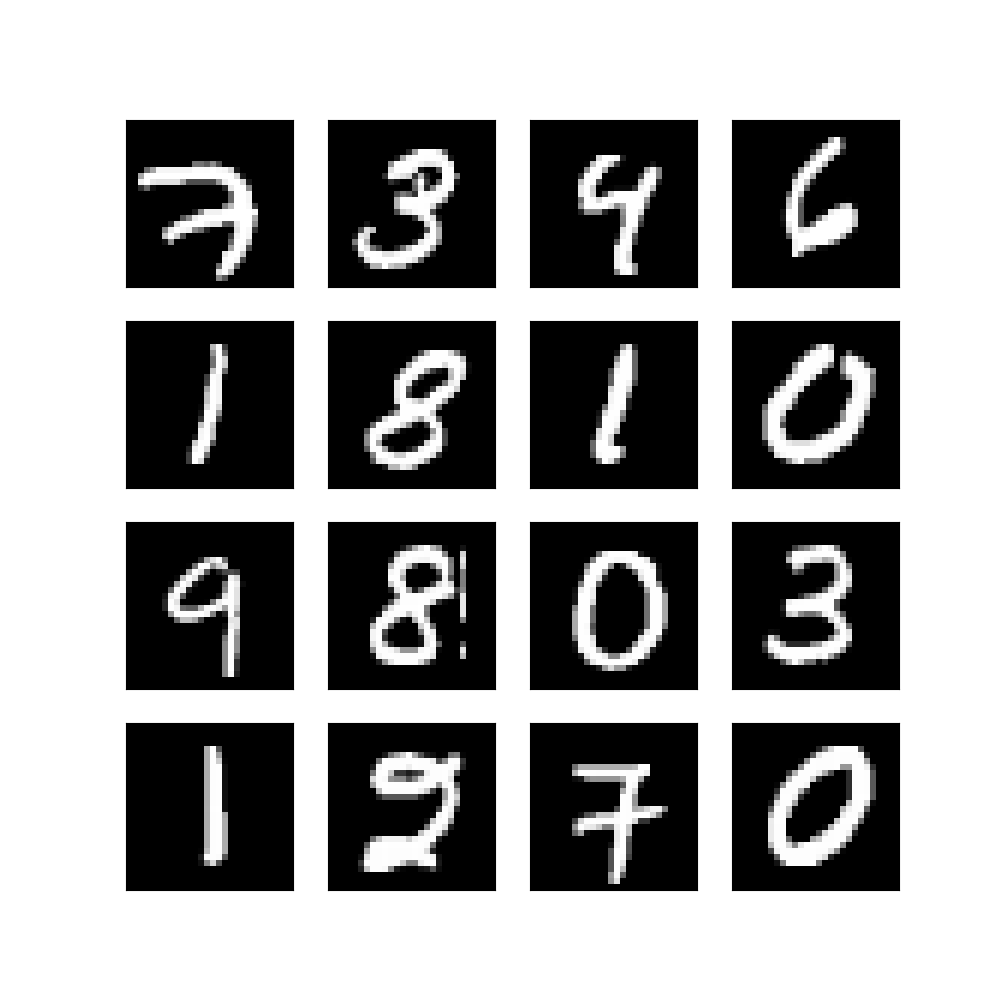

In [6]:
# Let us visualise the first 16 data points from the MNIST training data

fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(mnist.train.images[i].reshape(28, 28), cmap='Greys_r')  

In [7]:
# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(3000):
    batch = mnist.train.next_batch(50)
    # TODO
    # Write the optimisation code here
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0],y_:batch[1],keep_prob:1.0},session=sess)
        print('Step %d, training accuracy %g' % (i + 1, train_accuracy))
    train_step.run(feed_dict={x:batch[0],y_:batch[1],keep_prob:0.5},session=sess)
print('test accuracy %g' % accuracy.eval(feed_dict={x:mnist.test.images, y_:mnist.test.labels,keep_prob:1.0},session=sess))


Step 1, training accuracy 0.06
Step 101, training accuracy 0.68
Step 201, training accuracy 0.86
Step 301, training accuracy 0.9
Step 401, training accuracy 0.92
Step 501, training accuracy 0.94
Step 601, training accuracy 0.92
Step 701, training accuracy 0.96
Step 801, training accuracy 0.96
Step 901, training accuracy 0.94
Step 1001, training accuracy 0.9
Step 1101, training accuracy 0.96
Step 1201, training accuracy 0.98
Step 1301, training accuracy 0.96
Step 1401, training accuracy 0.98
Step 1501, training accuracy 0.96
Step 1601, training accuracy 0.96
Step 1701, training accuracy 0.96
Step 1801, training accuracy 0.96
Step 1901, training accuracy 0.96
Step 2001, training accuracy 0.94
Step 2101, training accuracy 0.94
Step 2201, training accuracy 0.94
Step 2301, training accuracy 1
Step 2401, training accuracy 0.96
Step 2501, training accuracy 0.94
Step 2601, training accuracy 0.98
Step 2701, training accuracy 0.96
Step 2801, training accuracy 0.98
Step 2901, training accuracy 0.

#### Visualising the Filters

We'll now visualise all the 25 filters in the first convolution layer. As they are each of shape 12x12x1, they may themselves be viewed as greyscale images. Visualising filters in further layers is more complicated and involves modifying the neural network. See the [paper](http://www.matthewzeiler.com/pubs/arxive2013/arxive2013.pdf) by Matt Zeiler and Rob Fergus if you are interested. 

<IPython.core.display.Javascript object>


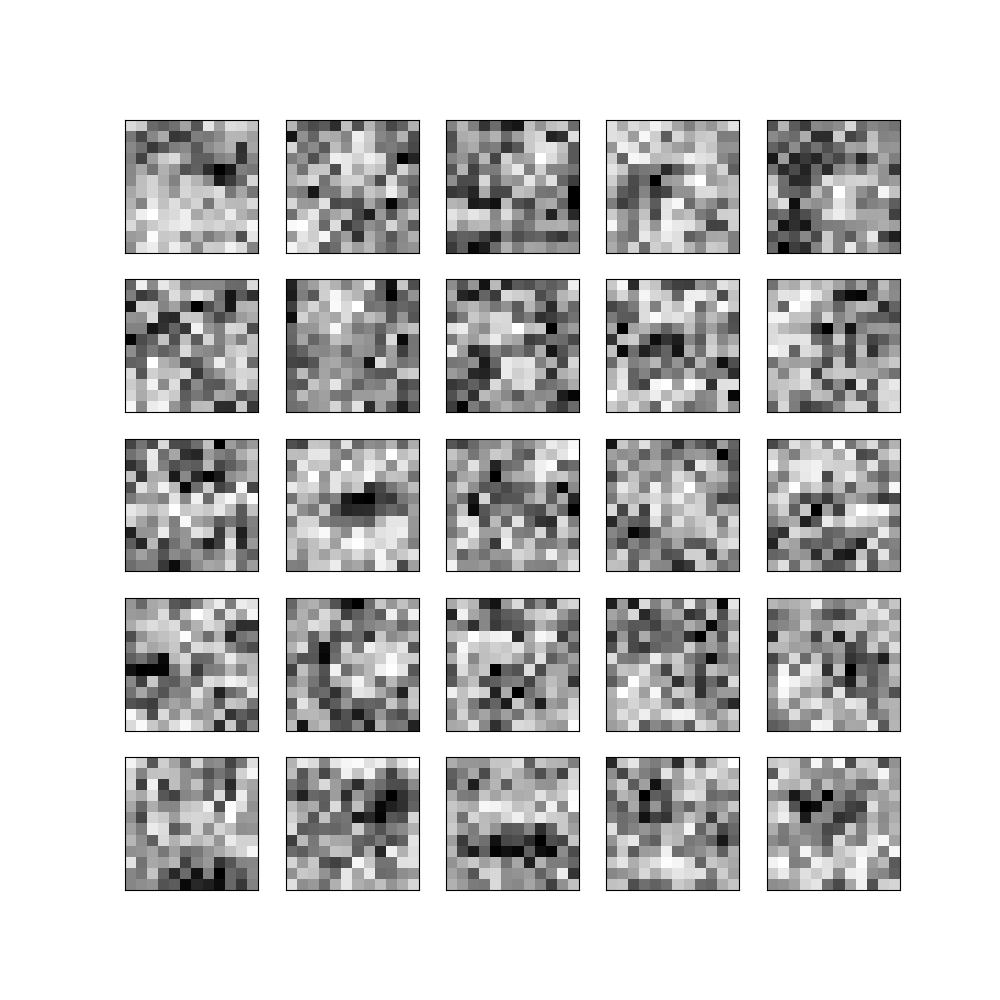

In [8]:
# Visualise the filters in the first convolutional layer
with sess.as_default():
    W = W_conv1.eval()

# Add code to visualise filters here
fig1 = plt.figure()
for i in range(25):
    ax = fig1.add_subplot(5,5,i+1)
    ax.set_xticks(())
    ax.set_yticks(())
    Wi = []
    for j in range(12):
        for k in range(12):
            Wi.append(W[j][k][0][i])
    Wi = np.array(Wi)
    ax.imshow(Wi.reshape(12,12),cmap='Greys_r')



#### Identifying image patches that activate the filters

For this part you'll find the 12 patches in the test-set that activate each of the first 5 filters that maximise the activation for that filter.

In [13]:
with sess.as_default():
    H = h_conv1.eval(feed_dict={x:mnist.test.images}) 
    H_sort = np.argsort(H,axis=None)
    h1
# Add code to visualise patches in the test set that find the most result in 
# the highest activations for filters 0, ... 4

[10124999  9292453  9292449 ... 14948016  9567536 14960141]
